# 1) Introduction
The problem that I will be investigating is determining the most suitable location for building a new gastro restaurant. A finacial investor as hired me, being a free-lancer, to investigate this problem. Not only will I be looking for the right area, but I will also be investigating what kind of restaurants are out there. The city of interest for the investor is Copenhagen, Denmark. Copenhagen has a population roughly around 700,000, and is the captial city of Denmark. With various industrial companies having offices around the central area, several tourist attractions and growing modern constructing buildings which directs other danish people from other cities in wanting to live here, copenhagen is an attractive area for opening up a restaurant. The investor has family connections to Denmark, and also has a house in the suburbs. It has always been an interest for him to open up a restaurant because of his passion for food. However, he wants to venture off in new explored areas in the food business, and does not want to open up a place that is already out there. This is why it is very crucial to investigate what type, and how many resturants are in the copenhagen area. Lastly, money is not an issue for him, so finding a location in an area where the rent is very high will not be a problem.

## 1.1) Data
To solve this problem, I will use foursquare to retrieve data on how many resturants are established in the copenhagen area. This will help me start to determine the possible candidates for location. At the same time, I will be using the data to see what type and how many categories are in the copenhagen city. The data will be scraped, and then a table will be constructed using pandas and beautifulsoup libraries. Once the dataframe is made, the analysis can begin in order to determine the best area to establish this restaurant. The type and number of restaurants will be determined using https://foursquare.com/explore?mode=url&near=Copenhagen%2C%20Denmark&nearGeoId=72057594040546361&q=Food, and population/neighborhoods in the copenhagen will be found on https://www.opendata.dk/city-of-copenhagen/oversigtskort.

## 1.2) Report structure
The structure of the report will start off with providing some background information about Copenhagen, and some practical information on some of the libraries that will be used for this project. They will not be covered in detail, since it is assumed that the majority of the readers would have some knowledge about these libraries. It should also be mentioned, it is not the intention to write a long report, but more a technical description of a problem followed by the solution/method. This will follow the data science methodology structure where the business problem, which is already defined in the previous section, followed by methodology including what processing methods will be needed, modelling, testing and then ensuring that the problem is solved.

# 2) Background information
Copenhagen is, as mentioned in the introduction section,

In [1]:
!pip install folium

     |████████████████████████████████| 92kB 13.0MB/s eta 0:00:01


In [3]:
!pip install geopy

In [2]:
!pip install geocoder

     |████████████████████████████████| 102kB 15.3MB/s ta 0:00:01


In [3]:

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests
import json
import geocoder
import pickle

In [4]:
url = 'https://en.wikipedia.org/wiki/Districts_of_Copenhagen'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
## scrape neighborhood list from page html stored in variable soup
list = []
for ultag in soup.find_all('ul'):
    for litag in ultag.find_all('li'):
        list.append(litag.text)

In [6]:
list = list[16:80]
list

['Middelalderbyen\nLatin Quarter',
 'Latin Quarter',
 'New Copenhagen\nFrederiksstaden\nNyboder',
 'Frederiksstaden',
 'Nyboder',
 'Gammelholm',
 'Slotsholmen',
 'Nørrevold, Østervold and Vestervold',
 'Latin Quarter',
 'Frederiksstaden',
 'Nyboder',
 'Christianshavn\nAsiatisk Plads\nWilders Plads\nKrøyers Plads\nNordatlantisk Brygge',
 'Asiatisk Plads',
 'Wilders Plads',
 'Krøyers Plads',
 'Nordatlantisk Brygge',
 'Holmen',
 'Asiatisk Plads',
 'Wilders Plads',
 'Krøyers Plads',
 'Nordatlantisk Brygge',
 'Amager East\nAmagerbro\nSundbyøster',
 'Amagerbro',
 'Sundbyøster',
 'Amager West\nIslands Brygge\nØrestad\nSundbyvester\nEberts Villaby',
 'Islands Brygge',
 'Ørestad',
 'Sundbyvester\nEberts Villaby',
 'Eberts Villaby',
 'Amagerbro',
 'Sundbyøster',
 'Islands Brygge',
 'Ørestad',
 'Sundbyvester\nEberts Villaby',
 'Eberts Villaby',
 'Eberts Villaby',
 'The Meatpacking District',
 'Humleby',
 'Carlsberg',
 'Kalvebod Brygge',
 'Havneholmen',
 'Sydhavnen\nSluseholmen\nTeglholmen',
 'Slu

In [7]:
df = pd.DataFrame(list, columns = ['Neighborhood'])
df.head()

,Neighborhood
0,Middelalderbyen\nLatin Quarter
1,Latin Quarter
2,New Copenhagen\nFrederiksstaden\nNyboder
3,Frederiksstaden
4,Nyboder


In [8]:
#drop rows that have no importance
df1 = df.drop(df.index[[0,2,7,21,24,41,51,52,53,60]])
df1 = df1.drop(df.index[[11,27,33]])
df1.head()

,Neighborhood
1,Latin Quarter
3,Frederiksstaden
4,Nyboder
5,Gammelholm
6,Slotsholmen


In [9]:
with open('df1.pkl', 'wb') as f:
    pickle.dump(df1, f)

In [10]:
## getting latitudes and longitudes for all the neighborhoods
latitudes = [] #empty list
longitudes = [] #empty list
for neighborhood in df1['Neighborhood'].tolist():
    g = geocoder.arcgis('{}, Copenhagen, Denmark'.format(str(neighborhood)))
    latitudes.append(g.latlng[0])
    longitudes.append(g.latlng[1])

In [64]:
len(longitudes), len(latitudes), len(df1)

(51, 51, 51)

In [11]:
#creating the dataframe
coord = pd.DataFrame({'Longitudes': longitudes, 'Latitudes': latitudes})
coord.head()

,Longitudes,Latitudes
0,12.567560,55.675670
1,12.547018,55.669152
2,12.567560,55.675670
3,12.577307,55.677352
4,12.582781,55.675469


In [12]:
#combine the df1 and coord datasets
df2 = pd.concat([df1, coord], axis = 1)
df2.head()

,Neighborhood,Longitudes,Latitudes
0,NaN,12.567560,55.675670
1,Latin Quarter,12.547018,55.669152
2,NaN,12.567560,55.675670
3,Frederiksstaden,12.577307,55.677352
4,Nyboder,12.582781,55.675469


In [13]:
#since there are missing coordinates, these locations have to be removed.
df2.dropna(inplace = True)
df2.head()

,Neighborhood,Longitudes,Latitudes
1,Latin Quarter,12.547018,55.669152
3,Frederiksstaden,12.577307,55.677352
4,Nyboder,12.582781,55.675469
5,Gammelholm,12.567560,55.675670
6,Slotsholmen,12.547018,55.669152


In [14]:
#saving the dataframe
with open('df2.pkl', 'wb') as f:
    pickle.dump(df2, f)

In [15]:
#making a copy of dataframe
df_clone = df2.copy(deep = True)

In [81]:
# create map of Pune using latitude and longitude values
from IPython.display import display
map_cph= folium.Map(location=[12.56553, 55.67594], zoom_start=10)

# add markers to map
for lat, lng,neighborhood in zip(df_clone['Latitudes'], df_clone['Longitudes'],df_clone['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cph)  
    
display(map_cph)

In [82]:
map_cph.save('map_cph.html')

In [18]:
#now we have our dataframe with the districts found in copenhagen.
CLIENT_ID = 'U3XAK32BDIOLRUCQN5K2SANFLOMCRUNSZ5UNDEF4FHY0ULUY' # your Foursquare ID
CLIENT_SECRET = 'BYVZ0355ZKI3KPSHUYKKEHZYNIOP2RDE4KXGNNIVLD3IZCHN'
VERSION = '20200314'
radius = 500
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
cph_venues = getNearbyVenues(names=df_clone['Neighborhood'],
                                   latitudes=df_clone['Latitudes'],
                                   longitudes=df_clone['Longitudes']
                                  )

Latin Quarter
Frederiksstaden
Nyboder
Gammelholm
Slotsholmen
Latin Quarter
Frederiksstaden
Nyboder
Asiatisk Plads
Wilders Plads
Krøyers Plads
Nordatlantisk Brygge
Holmen
Asiatisk Plads
Wilders Plads
Krøyers Plads
Nordatlantisk Brygge
Amagerbro
Sundbyøster
Islands Brygge
Ørestad
Eberts Villaby
Amagerbro
Sundbyøster
Islands Brygge
Ørestad
Eberts Villaby
Eberts Villaby
The Meatpacking District
Humleby
Carlsberg
Kalvebod Brygge
Havneholmen
Sluseholmen
Teglholmen
Sluseholmen
Teglholmen
Vigerslev
Amerika Plads
Nordhavn
Ryparken
Søndre Frihavn


In [20]:
print(cph_venues.shape)
cph_venues.head()

(1870, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Latin Quarter,55.669152,12.547018,Pizzeria MaMeMi,55.667879,12.548200,Pizza Place
1,Latin Quarter,55.669152,12.547018,Store VEGA,55.668221,12.543882,Music Venue
2,Latin Quarter,55.669152,12.547018,Osteria 16,55.667726,12.545811,Italian Restaurant
3,Latin Quarter,55.669152,12.547018,Lille VEGA,55.667878,12.544416,Music Venue
4,Latin Quarter,55.669152,12.547018,VEGA,55.668207,12.543911,Music Venue


In [21]:
#group the data based on venue category
cph_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
African Restaurant,1,1,1,1,1,1
American Restaurant,10,10,10,10,10,10
Arcade,2,2,2,2,2,2
Art Gallery,10,10,10,10,10,10
Art Museum,6,6,6,6,6,6
Asian Restaurant,14,14,14,14,14,14
Athletics & Sports,3,3,3,3,3,3
Australian Restaurant,2,2,2,2,2,2
BBQ Joint,2,2,2,2,2,2


In [22]:
cph_onehot = pd.get_dummies(cph_venues[['Venue Category']], prefix="", prefix_sep="")
#cph_onehot.rename(columns={'Neighborhood':'Neighbor'}, inplace=True)

cph_onehot['Neighborhood'] = cph_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cph_onehot.columns[-1]] + cph_onehot.columns[:-1].tolist()
cph_onehot = cph_onehot[fixed_columns]

print(cph_onehot.shape)
cph_onehot.head()

(1870, 186)


,Zoo Exhibit,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Train,Train Station,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
venues_grouped = cph_onehot.groupby(["Neighborhood"]).mean().reset_index()
with open('venues_grouped.pkl', 'wb') as f:
    pickle.dump(venues_grouped, f)
print(venues_grouped.shape)
venues_grouped

(27, 186)


,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train,Train Station,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amagerbro,0.000000,0.000000,0.014286,0.000000,0.000000,0.007143,0.014286,0.000000,0.000000,...,0.000000,0.007143,0.000000,0.007143,0.000000,0.014286,0.014286,0.000000,0.000000,0.000000
1,Amerika Plads,0.000000,0.011494,0.000000,0.022989,0.000000,0.000000,0.011494,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.022989,0.000000,0.011494,0.034483,0.011494,0.000000,0.011494
2,Asiatisk Plads,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,...,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000
3,Carlsberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Eberts Villaby,0.000000,0.000000,0.000000,0.000000,0.020619,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010309
5,Frederiksstaden,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.012987,0.000000,0.006494,...,0.000000,0.000000,0.000000,0.006494,0.000000,0.000000,0.025974,0.012987,0.006494,0.000000
6,Gammelholm,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000
7,Havneholmen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Holmen,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000
9,Humleby,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Amagerbro,Café,Scandinavian Restaurant,Grocery Store
1,Amerika Plads,Café,Bar,Coffee Shop
2,Asiatisk Plads,Grocery Store,Bakery,Fast Food Restaurant
3,Carlsberg,Plaza,Café,Boat or Ferry
4,Eberts Villaby,Hotel,Restaurant,Coffee Shop


In [51]:
from sklearn.cluster import KMeans
kclusters = 5

venues_grouped_clustering = venues_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_grouped_clustering)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [52]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

venues_merged = df_clone

venues_merged = venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head()

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Latin Quarter,12.547018,55.669152,0,Café,Scandinavian Restaurant,Bakery
3,Frederiksstaden,12.577307,55.677352,0,Scandinavian Restaurant,Café,Coffee Shop
4,Nyboder,12.582781,55.675469,0,Scandinavian Restaurant,Café,Bar
5,Gammelholm,12.567560,55.675670,0,Café,Scandinavian Restaurant,Gay Bar
6,Slotsholmen,12.547018,55.669152,0,Café,Coffee Shop,Pizza Place


In [53]:
import folium
# create map
latitude = 12.56553
longitude = 55.67594


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_merged['Latitudes'], venues_merged['Longitudes'], venues_merged['Neighborhood'], venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
venues_merged[venues_merged['Cluster Labels']==0]

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Latin Quarter,12.547018,55.669152,0,Café,Scandinavian Restaurant,Bakery
3,Frederiksstaden,12.577307,55.677352,0,Scandinavian Restaurant,Café,Coffee Shop
4,Nyboder,12.582781,55.675469,0,Scandinavian Restaurant,Café,Bar
5,Gammelholm,12.567560,55.675670,0,Café,Scandinavian Restaurant,Gay Bar
6,Slotsholmen,12.547018,55.669152,0,Café,Coffee Shop,Pizza Place
8,Latin Quarter,12.588922,55.674816,0,Café,Scandinavian Restaurant,Bakery
9,Frederiksstaden,12.594607,55.676142,0,Scandinavian Restaurant,Café,Coffee Shop
10,Nyboder,12.567560,55.675670,0,Scandinavian Restaurant,Café,Bar
12,Asiatisk Plads,12.485264,55.686055,0,Grocery Store,Bakery,Fast Food Restaurant
13,Wilders Plads,12.588922,55.674816,0,Café,Scandinavian Restaurant,Bakery


In [55]:
venues_merged[venues_merged['Cluster Labels']==1]

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
39,Kalvebod Brygge,12.59362,55.7142,1,Harbor / Marina,Scandinavian Restaurant,Hot Dog Joint


In [56]:
venues_merged[venues_merged['Cluster Labels']==2]

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
40,Havneholmen,12.560207,55.720773,2,Grocery Store,Supermarket,Gym


In [57]:
venues_merged[venues_merged['Cluster Labels']==3]

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
37,Humleby,12.507363,55.661125,3,Gym / Fitness Center,Indian Restaurant,Platform


In [58]:
venues_merged[venues_merged['Cluster Labels']==4]

,Neighborhood,Longitudes,Latitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
49,Ryparken,12.48374,55.68313,4,Mexican Restaurant,Pizza Place,Supermarket


In [59]:
venues_merged['1st Most Common Venue'].value_counts()


Café                       17
Hotel                       5
Scandinavian Restaurant     4
Coffee Shop                 3
Grocery Store               3
Park                        2
Pizza Place                 2
Mexican Restaurant          1
Sushi Restaurant            1
Gym / Fitness Center        1
Harbor / Marina             1
Plaza                       1
Bus Station                 1
Name: 1st Most Common Venue, dtype: int64

In [60]:
venues_merged['2nd Most Common Venue'].value_counts()

Scandinavian Restaurant    14
Café                        6
Pizza Place                 5
Bakery                      4
Restaurant                  3
Grocery Store               2
Soccer Stadium              2
Coffee Shop                 1
Supermarket                 1
Indian Restaurant           1
Ice Cream Shop              1
Pier                        1
Bar                         1
Name: 2nd Most Common Venue, dtype: int64

In [61]:
venues_merged['3rd Most Common Venue'].value_counts()

Coffee Shop             7
Bakery                  6
Gay Bar                 5
Burger Joint            4
Pizza Place             3
Grocery Store           2
Fast Food Restaurant    2
Bar                     2
Restaurant              2
Café                    2
Gym                     1
Supermarket             1
Platform                1
Beach                   1
Boat or Ferry           1
Italian Restaurant      1
Hot Dog Joint           1
Name: 3rd Most Common Venue, dtype: int64

[Text(0, 0, 'Café'),
 Text(0, 0, 'Scandinavian Restaurant'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Hotel'),
 Text(0, 0, 'Coffee Shop'),
 Text(0, 0, 'Bus Station'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Plaza'),
 Text(0, 0, 'Harbor / Marina'),
 Text(0, 0, 'Pizza Place'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'Sushi Restaurant'),
 Text(0, 0, 'Mexican Restaurant')]

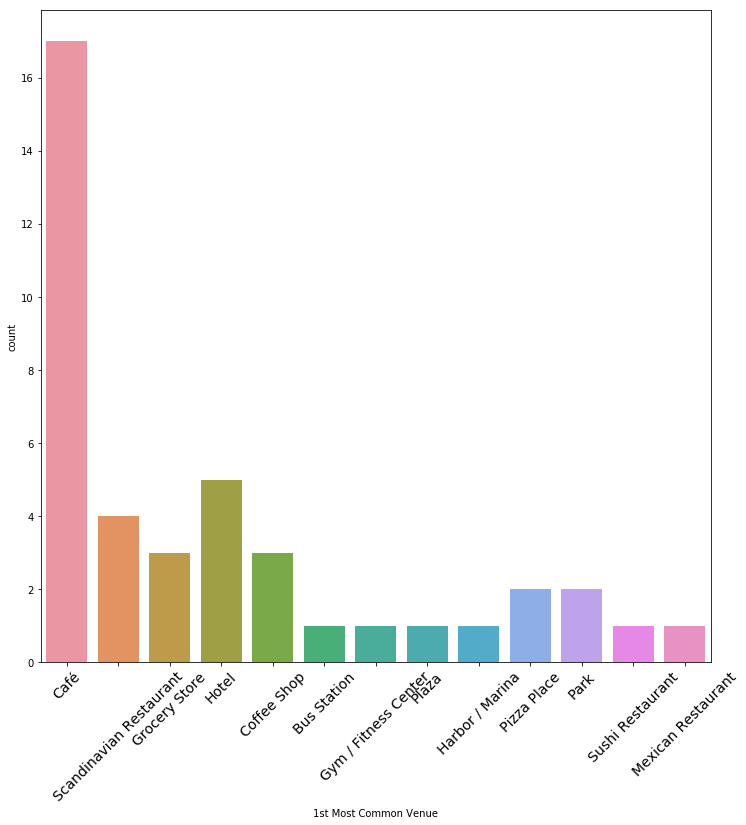

In [78]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.countplot(x = '1st Most Common Venue', data = venues_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 14)

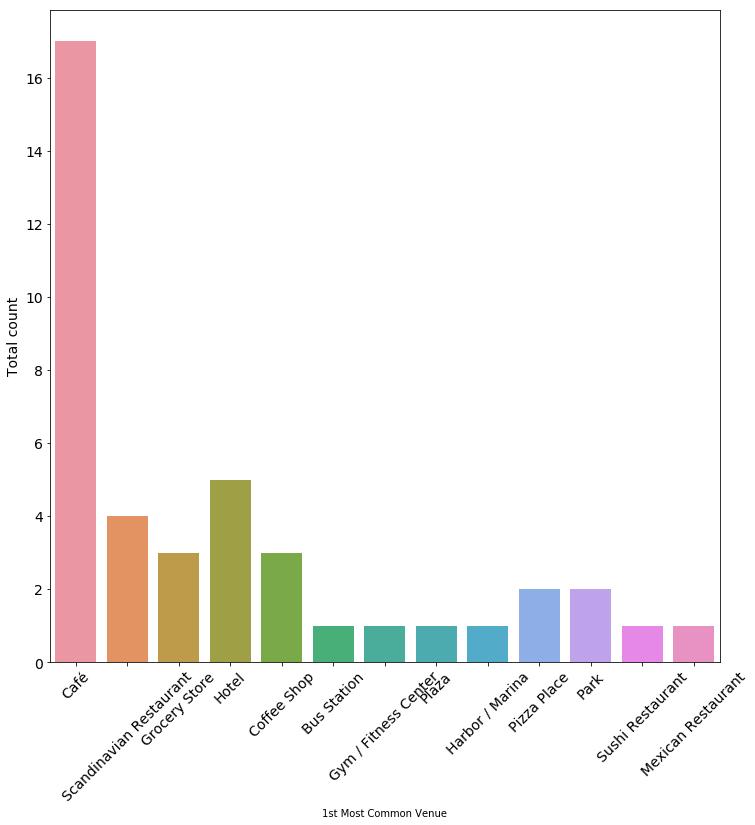

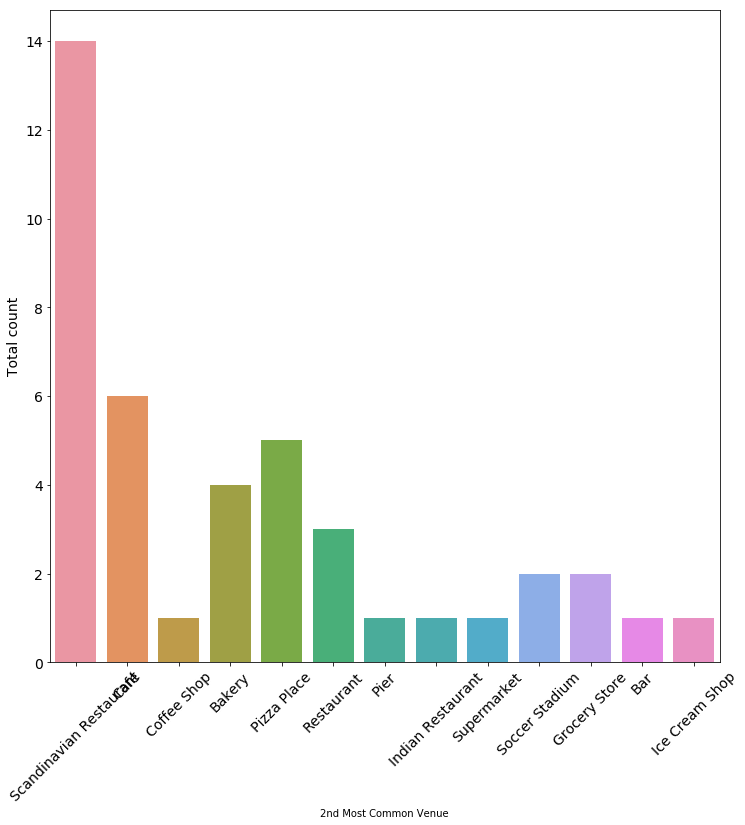

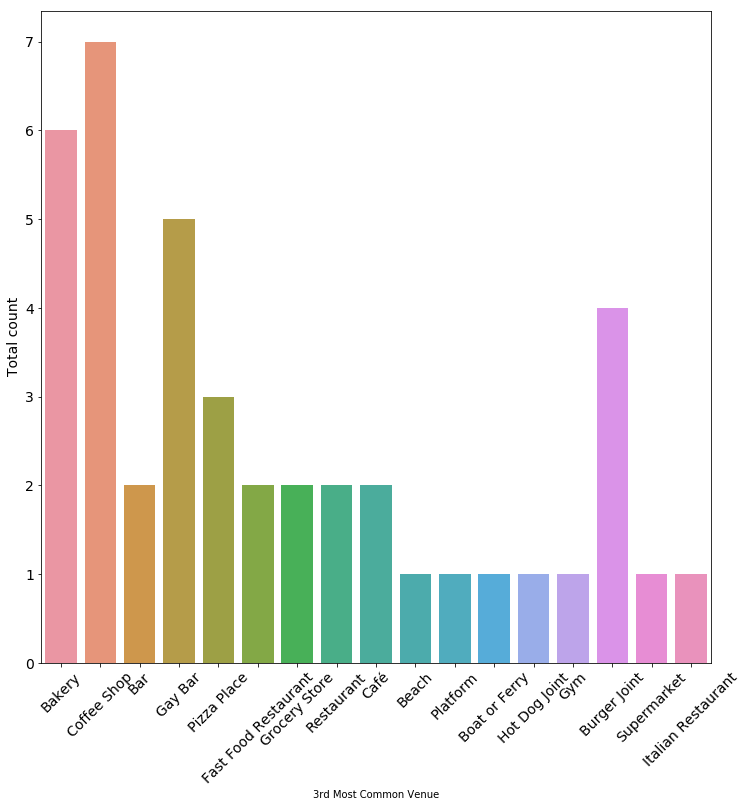

In [76]:
x = ['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']

for i in x:
    plt.figure(figsize = (12,12))
    sns.countplot(i, data = venues_merged)
    plt.xticks(rotation = 45, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('Total count', fontsize = 14)
           
plt.show()